<center>
    <h1> Wprowadzenie do transformacji PCA </h1>
</center>


Wygenerować dane (1000 punktów) na płaszczyźnie z 2-wymiarowego rozkładu normalnego o niediagonalnej macierzy kowariancji i narysować je.

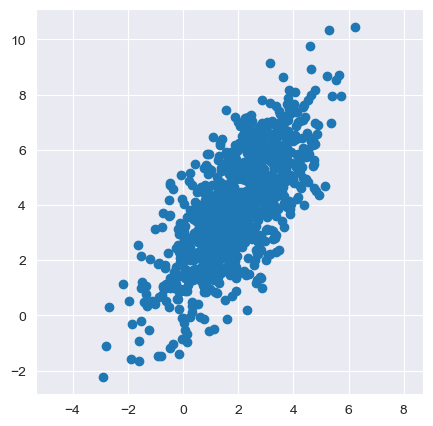

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n = 1000
mean = [2, 4]
A=np.array([[1,1],[0,2]])
cov = np.matmul(A, np.transpose(A)) #cov = A*A^T
X = np.random.multivariate_normal(mean, cov, n)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

* Pytamy się, które współrzędne są najważniejsze - opisują najwięcej informacji o naszych danych. 

Pierwszym krokiem jest normalizacja danych. Jako, że atrybut 1 może mieć inną skalę niż atrybut 2, konieczne jest ujednolicenie skal. Dokunujemy tego w dwóch krokach:

 * przesuwamy dane do środka układu współrzędnych

 * normalizujemy dane (dzielimy każdą współrzędną przez średnią długość wszyskich punktów)

Możemy to zrobić używając scalera.

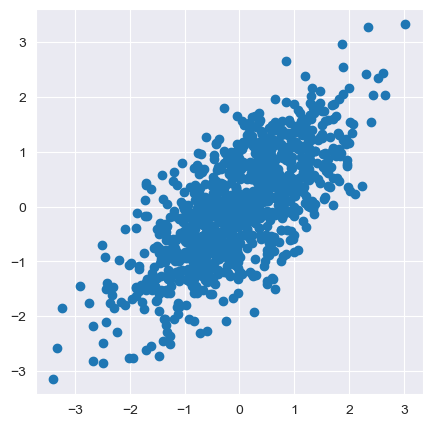

In [2]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X_std[:, 0], X_std[:, 1])
plt.axis('equal')
plt.show()

Wygląd naszych danych jest niemal identyczny jak poprzednio. Jedyna zmiana polega na zmianie skali. Tak naprawdę odchylenie standardowe na każdym atrybucie wynosi 1. 


# Zad 

Proszę sprawdzić, jakie jest odchylenie standardowe na każdej współrzędnej.

In [3]:
np.cov(X_std.T)

array([[1.001001  , 0.71268659],
       [0.71268659, 1.001001  ]])



Aby wyznaczyć kierunki decydujące o kształcie naszych danych, należy policzyć wektory i wartości wałasne z macierzy kowariancji.

**Definicja: **
Dla macierzy kwadratowej $A$, wektor własny $v$ i wartość własna $\lambda$ spełnia: 
$$
Av = \lambda v
$$

Zilustrujemy powyższe wielkości na przykładzie.

In [4]:
cov_mat = np.cov(X_std.T)
print('Macierz kowariancji: \n%s' %cov_mat)

e_values, e_vectors = np.linalg.eigh(cov_mat)

print('Eigenvectors \n%s' %e_vectors)
print('\nEigenvalues \n%s' %e_values)

Macierz kowariancji: 
[[1.001001   0.71268659]
 [0.71268659 1.001001  ]]
Eigenvectors 
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]

Eigenvalues 
[0.28831441 1.71368759]


# Zad
Narysujmy oba wektory na naszych danych przeskalowane przez odpowiadające im wartości własne.

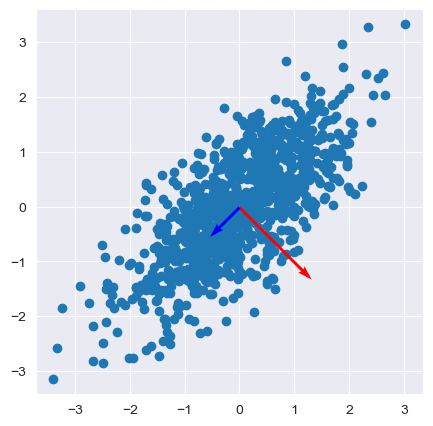

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X_std[:, 0], X_std[:, 1])
ax.quiver(0,0,e_vectors[0][0]/np.sqrt(e_values[0]), e_vectors[0][1]/np.sqrt(e_values[0]), angles='xy', scale_units='xy', scale=1, color='red')
ax.quiver(0,0,e_vectors[1][0]/np.sqrt(e_values[1]), e_vectors[1][1]/np.sqrt(e_values[1]), angles='xy', scale_units='xy', scale=1, color='blue')
plt.axis('equal')
plt.show()

## Co zrobiliśmy (trochę matematyki)? 

Przedstawiliśmy macierz kowariancji $\Sigma$ w postaci iloczynu:
$$
\Sigma = V S V^T
$$
gdzie $V$ to macierz zawierająca na kolumnach wektory własne, a $S$ to macierz diagonalna, która na przekątnej ma wartości własne.

# Zad. 

Zweryfikować powyższe stwierdzenie tzn. sprawdzić, że powyższy iloczyn rzeczywiście daje macierz kowariancji.

In [10]:
print("Iloczyn macierzy: \n", np.dot(np.dot(e_vectors, np.diag(e_values)), e_vectors.T))
print("Macierz kowariancji: \n", cov_mat)

Iloczyn macierzy: 
 [[1.001001   0.71268659]
 [0.71268659 1.001001  ]]
Macierz kowariancji: 
 [[1.001001   0.71268659]
 [0.71268659 1.001001  ]]


# Zad 
Wykonajmy tą procedurę za pomoca funkcji
```python
from sklearn.decomposition import PCA
```

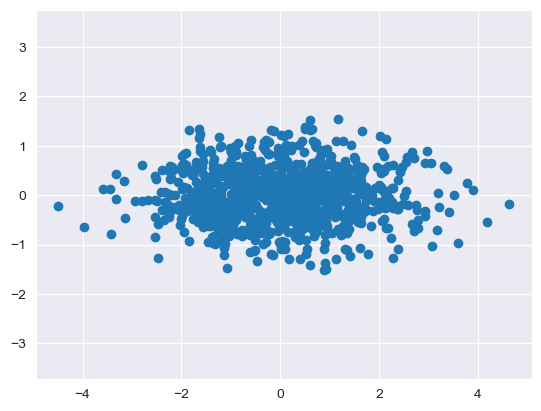

In [11]:
from sklearn.decomposition import PCA
model = PCA()

pca_features = model.fit_transform(X_std) # dwa wymiary, wiec rzutowanie jest na dwa wymiary

xs = pca_features[:,0]
ys = pca_features[:,1]

plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Zad 
Wykonajmy test korelacji

In [12]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(xs, ys)
print(correlation)
print(pvalue)

-6.418476861114186e-17
1.0000000000000013


### Wizualizacja wartości "na nowych wymiarach"

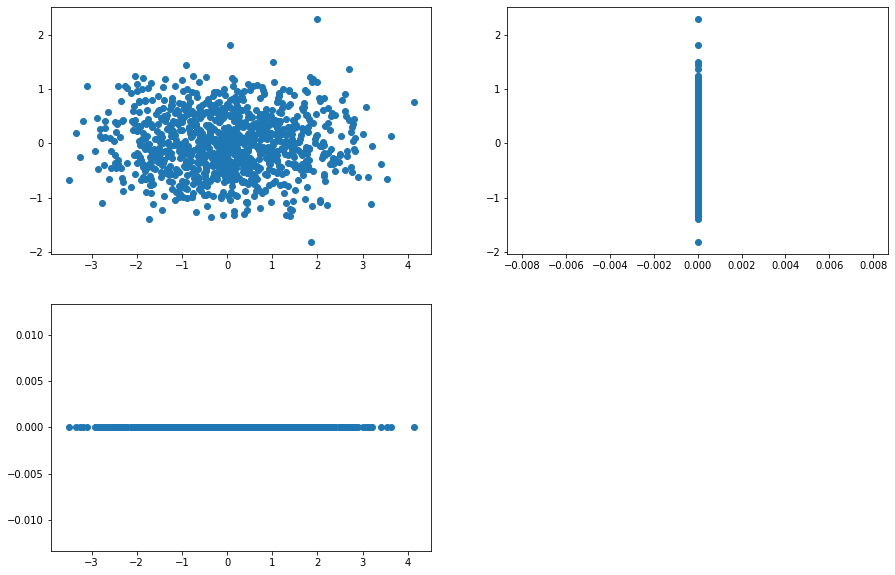

In [18]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(xs, ys)

plt.subplot(2,2,2)
plt.scatter(np.zeros_like(ys),ys)

plt.subplot(2,2,3)
plt.scatter(xs, np.zeros_like(xs))
plt.show()


# Najważniejsze składowe

In [19]:
np.var(xs), np.var(ys)

(1.6923235758792305, 0.3076764241207693)

In [20]:
model.explained_variance_

array([1.69401759, 0.30798441])

In [21]:
model.explained_variance_ratio_

array([0.84616179, 0.15383821])

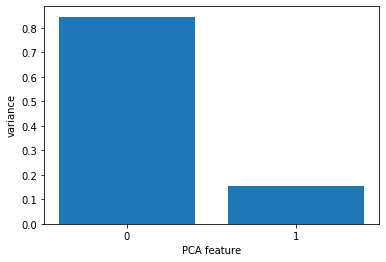

In [22]:
features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

# Zad
Wygenerujmy dane z rozkładu normalnego z 5 zmiennymi gdzie dwie pary są silnie skorelowane.

Jak wyznaczyć liczbę ważnych składowych?


In [13]:
s = np.diag([1.]*5)
s[[0,1,3,4],[1,0,4,3]] = 0.98
print(s)
x = np.random.multivariate_normal([0]*5,s,200)

[[1.   0.98 0.   0.   0.  ]
 [0.98 1.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.98]
 [0.   0.   0.   0.98 1.  ]]


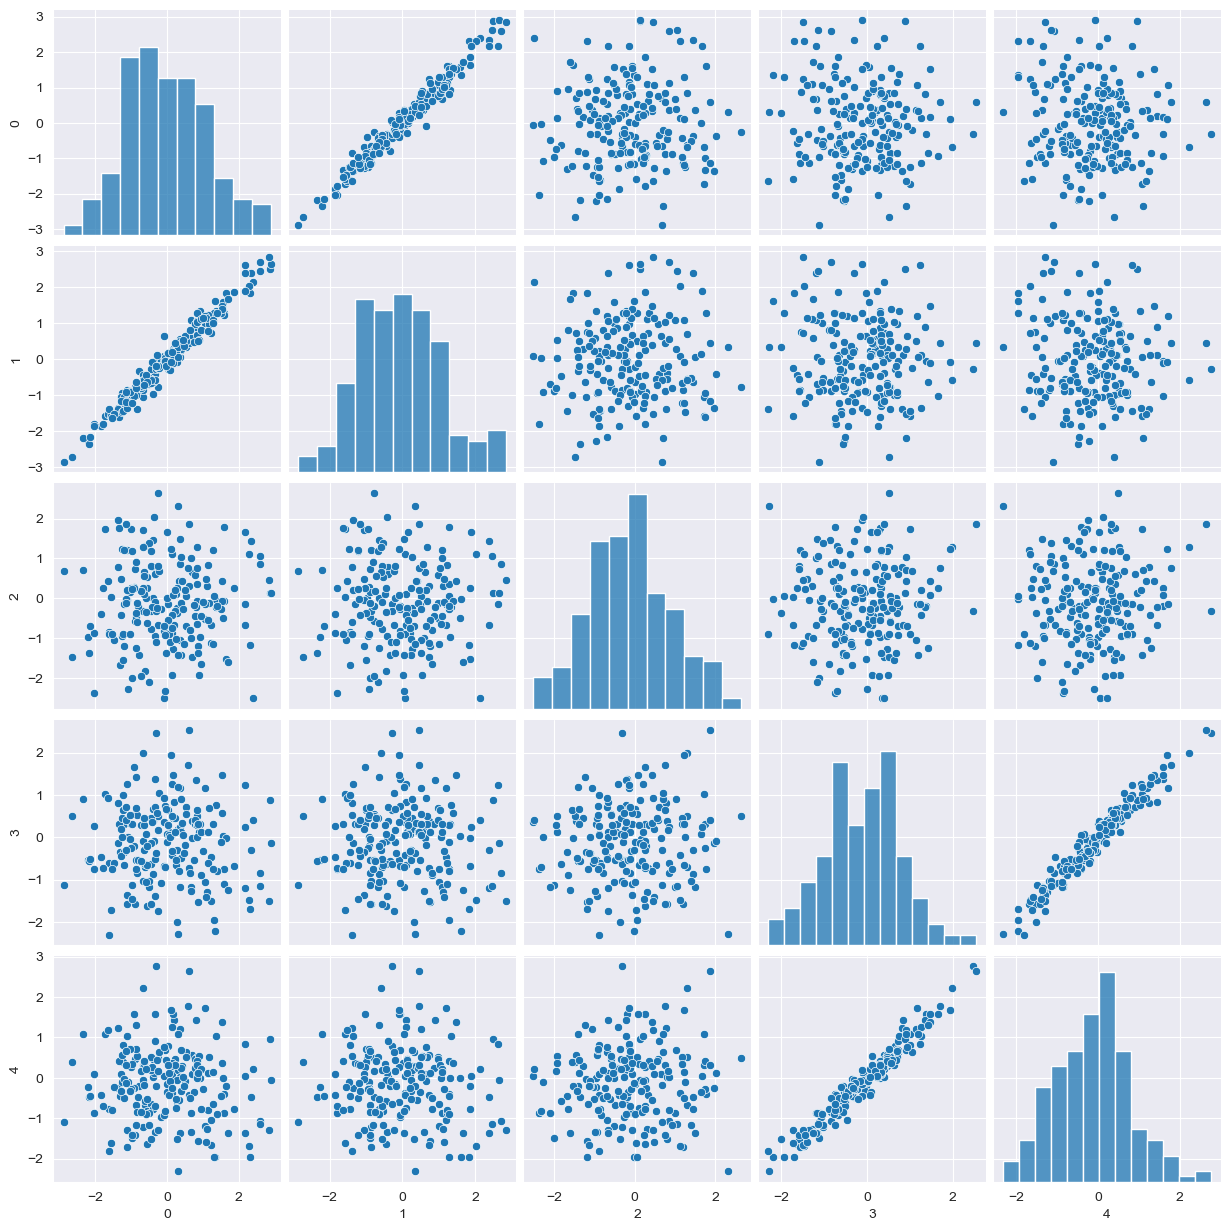

In [14]:
df=pd.DataFrame(x)
sns.pairplot(df)
plt.show()

In [15]:
pca = PCA()
pca.fit(x)

PCA()

In [16]:
pca.components_.shape

(5, 5)

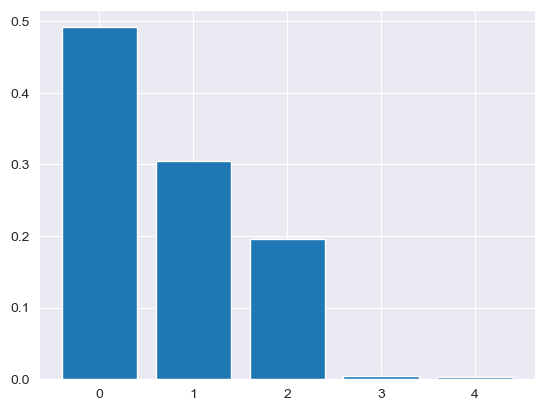

In [17]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

# Oczywiście 3

In [76]:
x_pca = pca.transform(x)

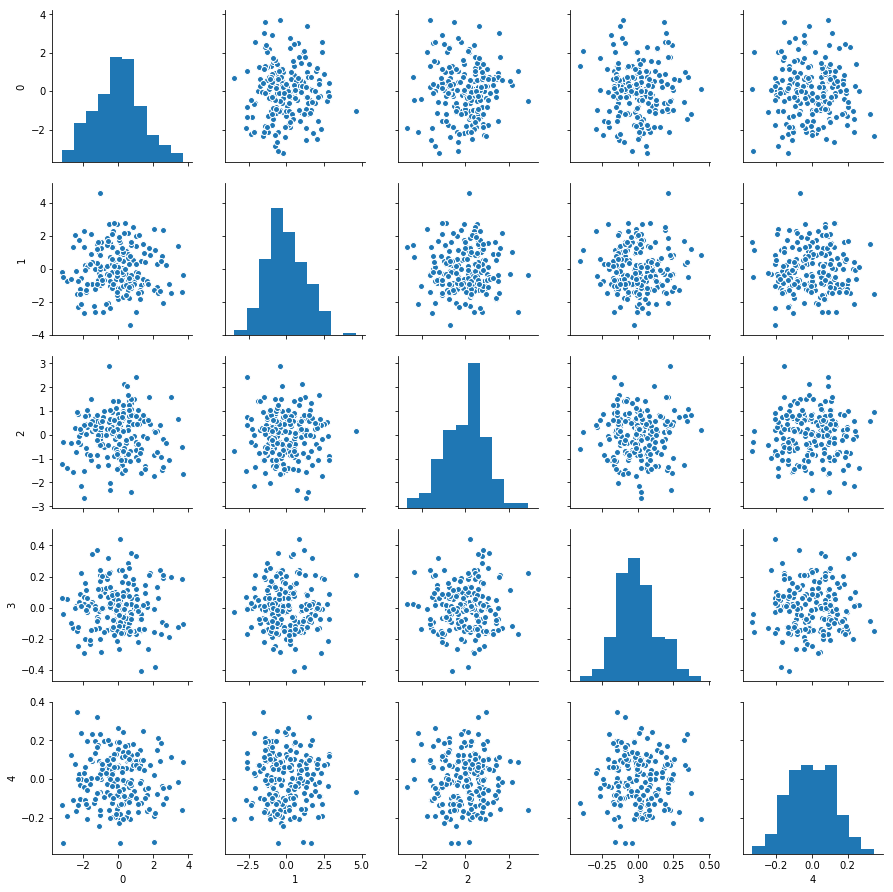

In [77]:
df=pd.DataFrame(x_pca)
sns.pairplot(df)
plt.show()

In [78]:
pca = PCA(n_components=3)
x_pca_3 = pca.fit_transform(x)

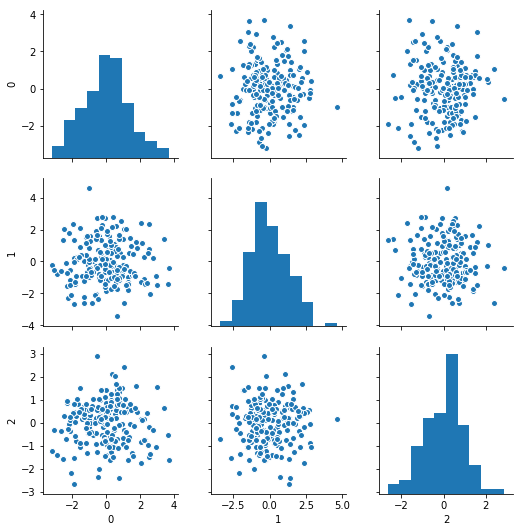

In [79]:
df=pd.DataFrame(x_pca_3)
sns.pairplot(df)
plt.show()